In [1]:
# Run this in your Python environment
import pandas as pd
import numpy as np

In [2]:
dates = pd.date_range(start="2024-01-01", end="2024-03-31")
product_ids = ['A001', 'A002', 'A003']

In [3]:
data = []
for pid in product_ids:
    for date in dates:
        units_sold = np.random.poisson(20 if pid == 'A001' else 15 if pid == 'A002' else 10)
        data.append([date.strftime('%Y-%m-%d'), pid, units_sold])

sales_df = pd.DataFrame(data, columns=['date', 'product_id', 'units_sold'])
sales_df.to_csv('mock_sales_data.csv', index=False)

In [4]:
pip install pyodbc pandas prophet


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pyodbc
import pandas as pd

In [19]:
import pyodbc
import pandas as pd

conn = pyodbc.connect(
    r'Driver={ODBC Driver 18 for SQL Server};'
    r'Server=ABDUL_RAHIM\SQLEXPRESS;'
    r'Database=InventoryOptmization;'
    r'Trusted_Connection=yes;'
    r'TrustServerCertificate=yes;'
)



In [21]:
query = """
SELECT [date], product_id, units_sold
FROM sales_data
WHERE product_id = 'A001'
ORDER BY [date];
"""


In [31]:
df = pd.read_sql(query, conn)
df.head(20)

C:\Users\mulla\AppData\Local\Temp\ipykernel_118004\2748713676.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,date,product_id,units_sold
0,2024-01-01,A001,21
1,2024-01-01,A001,21
2,2024-01-02,A001,23
3,2024-01-02,A001,23
4,2024-01-03,A001,19
5,2024-01-03,A001,19
6,2024-01-04,A001,17
7,2024-01-04,A001,17
8,2024-01-05,A001,16
9,2024-01-05,A001,16


In [23]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from prophet import Prophet
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [25]:
# Step 1: Prepare the data
df_forecast = df.copy()
df_forecast.rename(columns={'date': 'ds', 'units_sold': 'y'}, inplace=True)

In [26]:
# Step 1: Prepare the data
df_forecast = df.copy()
df_forecast.rename(columns={'date': 'ds', 'units_sold': 'y'}, inplace=True)

In [28]:
# Step 2: Fit the Prophet model
model = Prophet()
model.fit(df_forecast)

19:18:49 - cmdstanpy - INFO - Chain [1] start processing
19:18:49 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
# Step 3: Create future dataframe
future = model.make_future_dataframe(periods=30)  # Forecast 30 days
forecast = model.predict(future)

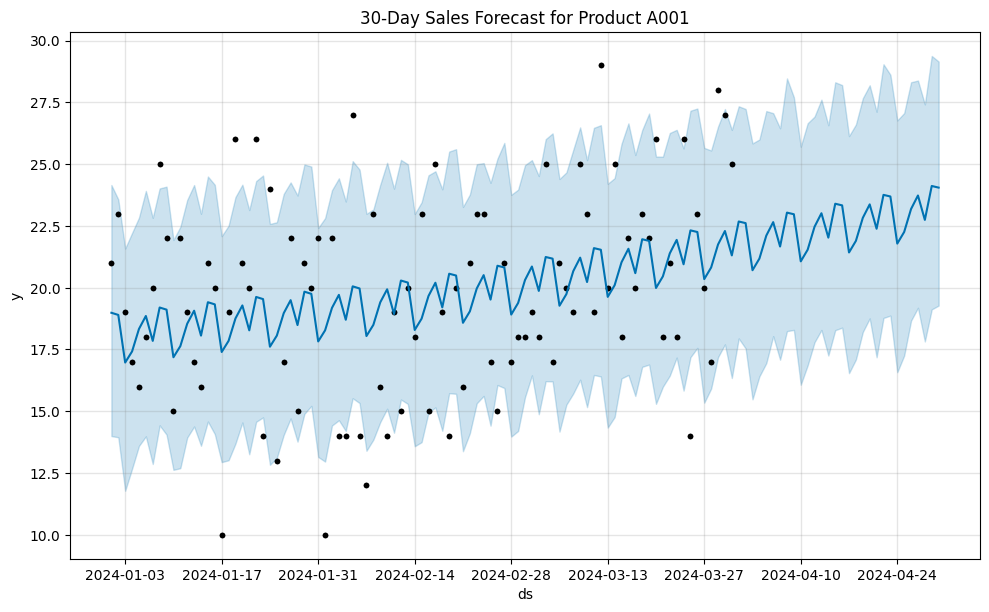

In [30]:
# Step 4: Plot forecast
fig = model.plot(forecast)
plt.title('30-Day Sales Forecast for Product A001')
plt.show()

In [32]:
# Select only relevant columns
forecast_export = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [33]:
forecast_export

,ds,yhat,yhat_lower,yhat_upper
0,2024-01-01,18.984227,13.993059,24.153277
1,2024-01-02,18.897458,13.946433,23.571194
2,2024-01-03,16.970684,11.779762,21.585571
3,2024-01-04,17.419934,12.671646,22.215175
4,2024-01-05,18.328934,13.595786,22.833648
...,...,...,...,...
116,2024-04-26,23.184068,18.664663,28.312930
117,2024-04-27,23.730335,19.184990,28.382294
118,2024-04-28,22.743182,17.822400,27.417655
119,2024-04-29,24.115308,19.121804,29.377898


In [34]:
# Save to CSV
forecast_export.to_csv('product_A001_forecast.csv', index=False)
print("Forecast exported successfully!")

Forecast exported successfully!
